In [1]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[4.61294863],
       [2.89658072]])

In [4]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [5]:
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [6]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.61294863],
       [10.40611007]])

In [7]:
import matplotlib.pyplot as plt

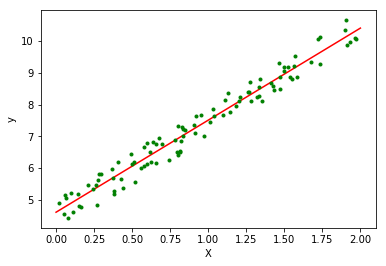

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'g.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_model.intercept_

array([4.61294863])

In [13]:
linear_model.coef_

array([[2.89658072]])

In [15]:
linear_model.predict(X_new)

array([[ 4.61294863],
       [10.40611007]])

In [16]:
lr=0.1
n_iter = 1000
m=100
theta = np.random.randn(2,1)


In [17]:
for iter in range(n_iter):
    grad = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - lr*grad
theta

array([[4.61294863],
       [2.89658072]])

In [18]:
n_epoch = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t1+t)
theta = np.random.randn(2,1)
theta
for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grad = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*grad
theta
        

array([[4.61157725],
       [2.90722826]])

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_


c:\users\nana\anaconda3\envs\ml-learn-3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.61147592]), array([2.89360501]))

In [22]:
# polynomial regression
m=100
X = 6*np.random.rand(m,1)-3
y=0.5*X**2 + X + 2 + np.random.randn(m,1)

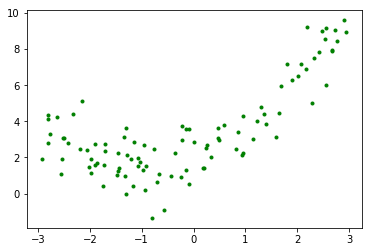

In [23]:
plt.plot(X,y,'g.')
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature.fit_transform(X)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01209992]), array([[1.00636241, 0.53494409]]))

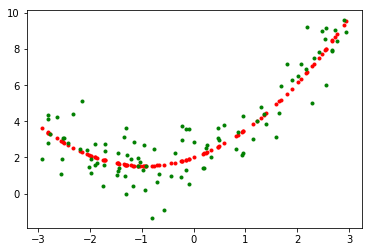

In [30]:
py=0.53*X**2 + X + 2 
plt.plot(X,py,'r.')
plt.plot(X,y, 'g.')
plt.show()

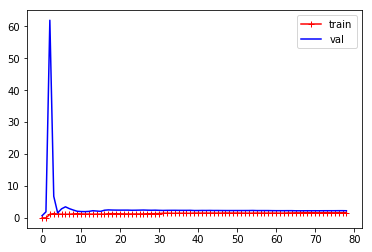

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val[:m]))
    plt.plot(np.sqrt(train_errors), 'r-+', label='train')
    plt.plot(np.sqrt(val_errors), 'b-', label='val')
    plt.legend()

reg_model = LinearRegression()
plot_learning_curves(reg_model, X, y)

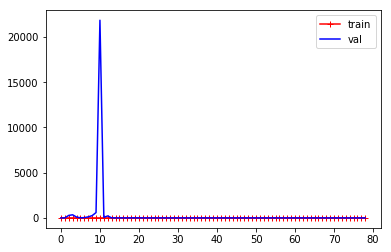

In [37]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg',LinearRegression()),
))
plot_learning_curves(poly_reg, X,y)

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.1657118]])

In [39]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

c:\users\nana\anaconda3\envs\ml-learn-3.5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.06989399])

In [40]:
from sklearn.linear_model import Lasso
las_reg = Lasso(alpha=0.1)
las_reg.fit(X,y)
las_reg.predict([[1.5]])

array([5.11406691])

In [41]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X,y)
en.predict([[1.5]])

array([5.11396934])

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['target', 'target_names', 'filename', 'DESCR', 'feature_names', 'data']

In [3]:
import numpy as np
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)



c:\users\nana\anaconda3\envs\ml-learn-3.5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


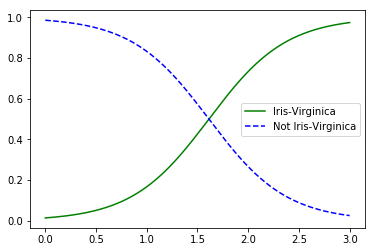

In [7]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
log_reg = LogisticRegression()
log_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')
plt.legend()

In [8]:
x = iris['data'][:,(2,3)]
y = iris['target']
s_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
s_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
s_reg.predict([[5,2]])


array([2])

In [10]:
s_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])